# importing Needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset

In [3]:
data = pd.read_csv('mcc_group_definition.csv')
data1 = pd.read_csv('2016-09-19_79351_training.csv')
data2 = pd.read_csv('transaction_types.csv')
data

,mcc_group,explanation
0,1,ATM
1,2,Groceries
2,3,Gastronomie
3,4,Shopping/(Fashion)
4,5,"Home and DIY, House Energy"
5,6,Travel/Hotel
6,7,Transport
7,8,Automotive/Gas
8,9,Family/Babies/Children
9,10,Entertainment/Leisure


In [4]:
data2

,type,explanation,direction,agent
0,AR,Authorization reject,-,Card
1,AE,Authorization expired,In,Card
2,AV,Authorization Reversal,In,Card
3,BBU,Cash26 deposit,In,Partner
4,CT,Credit Transfer,In,Bank Account
5,DI,Dispute,In,Card
6,DR,Debit Reversal,In,Bank Account
7,PF,Credit Card refund by merchant,In,Card
8,PR,Presentment Reversal,In,Card
9,WU,Referral payment,In,Number26


In [5]:
data2['direction'].value_counts()

Out    11
In     11
-       1
Name: direction, dtype: int64

<AxesSubplot:>

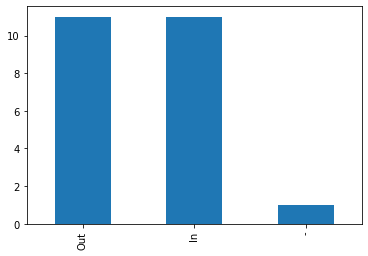

In [6]:
data2['direction'].value_counts().plot(kind = 'bar')

In [7]:
data1.tail()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user
408541,bc639c7495889105713fc6b1025264ac,2016-07-31,DT,NaN,5,training,training
408542,0dfb685e3d705957ef9e0c472604b067,2016-07-31,DT,NaN,155,training,training
408543,918eb93c2d3b084614e3570886715f84,2016-07-31,DT,NaN,19,training,training
408544,918eb93c2d3b084614e3570886715f84,2016-07-31,DT,NaN,19,training,training
408545,25afbb78936ce100bbd1e61cecb37403,2016-07-31,DT,NaN,36,training,training


In [8]:
data1.columns


Index(['user_id', 'transaction_date', 'transaction_type', 'mcc_group',
       'amount_n26_currency', 'dataset_transaction', 'dataset_user'],
      dtype='object')

In [9]:
data2.columns = ['transaction_type', 'explanation', 'direction', 'agent']

# Merging data 

In [10]:
newdata = data1[["user_id", "transaction_date","amount_n26_currency","mcc_group",
                 "transaction_type"]].merge(data2[["transaction_type"
                         , "direction", ]],on = "transaction_type", how='inner')

In [11]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,NaN,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,NaN,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,NaN,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,NaN,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,NaN,DT,Out
...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,NaN,TUB,Out
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,NaN,TUB,Out
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,NaN,TUB,Out
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,NaN,TUB,Out


# PREPROCESSING/ DATA CLEANING

In [12]:
newdata.head(100)

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,NaN,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,NaN,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,NaN,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,NaN,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,NaN,DT,Out
...,...,...,...,...,...,...
95,049f700ee31bd4112333d919da9ed192,2016-02-01,49,NaN,DT,Out
96,60a06917fcdfc145734fb27b496fdd07,2016-02-01,161,NaN,DT,Out
97,bd84cc070c60f835ad14534834a33ec6,2016-02-01,4,NaN,DT,Out
98,0e55c5d598cb03d7a9ca656a0c838479,2016-02-01,35,NaN,DT,Out


In [13]:
#Checking for null values
newdata.isnull().sum()

user_id                     0
transaction_date            0
amount_n26_currency         0
mcc_group              150222
transaction_type            0
direction                   0
dtype: int64

In [14]:
# filling missing values in  mcc_group with random values from the coloumns
for col in newdata:
    mask = pd.isnull(newdata[col])
    pop = newdata[col].dropna()
    if len(pop):
        sample = np.random.choice(pop, size=len(newdata)-len(pop), replace=True)
        newdata.loc[mask, col] = sample
       

In [15]:
newdata.isnull().sum()

user_id                0
transaction_date       0
amount_n26_currency    0
mcc_group              0
transaction_type       0
direction              0
dtype: int64

In [16]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,2.0,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,2.0,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,4.0,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,8.0,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,2.0,DT,Out
...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,17.0,TUB,Out
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,2.0,TUB,Out
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,3.0,TUB,Out
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,1.0,TUB,Out


In [17]:
#Adding a column for expenses and income
newdata['income']=np.where(newdata['direction']=="In", newdata['amount_n26_currency'],0)
newdata['expenses']=np.where(newdata['direction']=="Out", newdata['amount_n26_currency'],0) 
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction,income,expenses
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,2.0,DT,Out,0,350
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,2.0,DT,Out,0,202
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,4.0,DT,Out,0,291
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,8.0,DT,Out,0,214
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,2.0,DT,Out,0,272
...,...,...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,17.0,TUB,Out,0,11
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,2.0,TUB,Out,0,40
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,3.0,TUB,Out,0,185
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,1.0,TUB,Out,0,71


# convert the 'Date' column to datetime format

In [18]:


newdata['transaction_date']= newdata['transaction_date'].astype('datetime64[ns]')
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408546 entries, 0 to 408545
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              408546 non-null  object        
 1   transaction_date     408546 non-null  datetime64[ns]
 2   amount_n26_currency  408546 non-null  int64         
 3   mcc_group            408546 non-null  float64       
 4   transaction_type     408546 non-null  object        
 5   direction            408546 non-null  object        
 6   income               408546 non-null  int64         
 7   expenses             408546 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 28.1+ MB


In [19]:
newdata['transaction_date'] = pd.to_datetime(newdata['transaction_date'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
newdata['year'] = newdata['transaction_date'].dt.year
newdata['month'] = newdata['transaction_date'].dt.month
newdata['week'] = newdata['transaction_date'].dt.isocalendar().week
newdata['day'] = newdata['transaction_date'].dt.day
newdata['hour'] = newdata['transaction_date'].dt.hour
newdata['minute'] = newdata['transaction_date'].dt.minute
newdata['dayofweek'] = newdata['transaction_date'].dt.dayofweek

In [20]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction,income,expenses,year,month,week,day,hour,minute,dayofweek
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,2.0,DT,Out,0,350,2016,2,5,1,0,0,0
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,2.0,DT,Out,0,202,2016,2,5,1,0,0,0
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,4.0,DT,Out,0,291,2016,2,5,1,0,0,0
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,8.0,DT,Out,0,214,2016,2,5,1,0,0,0
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,2.0,DT,Out,0,272,2016,2,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,17.0,TUB,Out,0,11,2016,7,30,29,0,0,4
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,2.0,TUB,Out,0,40,2016,7,30,29,0,0,4
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,3.0,TUB,Out,0,185,2016,7,30,29,0,0,4
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,1.0,TUB,Out,0,71,2016,7,30,30,0,0,5


# creating a new dataframe for income and expenses separtely

In [21]:
income_data = pd.DataFrame(newdata, columns =['year','month','week','day','hour','minute','dayofweek','transaction_type','mcc_group','income'])
index_names = income_data[ income_data['income'] == 0].index
income_data.drop(index_names, inplace = True)
income_data

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,income
40528,2016,2,5,1,0,0,0,CT,1.0,24
40529,2016,2,5,1,0,0,0,CT,3.0,38
40530,2016,2,5,1,0,0,0,CT,6.0,34
40531,2016,2,5,1,0,0,0,CT,2.0,5
40532,2016,2,5,1,0,0,0,CT,4.0,7
...,...,...,...,...,...,...,...,...,...,...
407369,2016,7,30,30,0,0,5,BBU,2.0,57
407370,2016,7,30,30,0,0,5,BBU,2.0,57
407371,2016,7,30,30,0,0,5,BBU,2.0,19
407372,2016,7,30,30,0,0,5,BBU,6.0,115


In [22]:
expenses_data = pd.DataFrame(newdata, columns =['year','month','week','day','hour','minute','dayofweek','transaction_type','mcc_group','expenses',])
expenses_names = expenses_data[ expenses_data['expenses'] == 0].index
expenses_data.drop(expenses_names, inplace = True)
expenses_data

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,expenses
0,2016,2,5,1,0,0,0,DT,2.0,350
1,2016,2,5,1,0,0,0,DT,2.0,202
2,2016,2,5,1,0,0,0,DT,4.0,291
3,2016,2,5,1,0,0,0,DT,8.0,214
4,2016,2,5,1,0,0,0,DT,2.0,272
...,...,...,...,...,...,...,...,...,...,...
408541,2016,7,30,29,0,0,4,TUB,17.0,11
408542,2016,7,30,29,0,0,4,TUB,2.0,40
408543,2016,7,30,29,0,0,4,TUB,3.0,185
408544,2016,7,30,30,0,0,5,TUB,1.0,71


# Label Encoding of transaction_type

In [23]:
expenses_data['transaction_type'].unique()

array(['DT', 'FT', 'DD', 'PT', 'BUB', 'TUB'], dtype=object)

In [24]:

from  sklearn.preprocessing import LabelEncoder 

label_encoder= LabelEncoder()
expenses_data['transaction_type']= label_encoder.fit_transform(expenses_data['transaction_type'])
expenses_data['transaction_type'].unique()

income_data['transaction_type']= label_encoder.fit_transform(income_data['transaction_type'])
income_data['transaction_type'].unique()




array([1, 2, 0])

In [25]:
expenses_data

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,expenses
0,2016,2,5,1,0,0,0,2,2.0,350
1,2016,2,5,1,0,0,0,2,2.0,202
2,2016,2,5,1,0,0,0,2,4.0,291
3,2016,2,5,1,0,0,0,2,8.0,214
4,2016,2,5,1,0,0,0,2,2.0,272
...,...,...,...,...,...,...,...,...,...,...
408541,2016,7,30,29,0,0,4,5,17.0,11
408542,2016,7,30,29,0,0,4,5,2.0,40
408543,2016,7,30,29,0,0,4,5,3.0,185
408544,2016,7,30,30,0,0,5,5,1.0,71


# Randomly Selecting Rows from the data

In [26]:
rand_data_income=income_data.sample(n=10000,random_state = 0)
rand_data_income

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,income
83162,2016,6,22,1,0,0,2,1,8.0,101
48184,2016,2,8,23,0,0,1,1,16.0,77
85175,2016,6,23,10,0,0,4,1,1.0,389
74728,2016,5,18,4,0,0,2,1,1.0,322
91155,2016,6,25,24,0,0,4,1,6.0,194
...,...,...,...,...,...,...,...,...,...,...
100951,2016,7,29,20,0,0,2,1,2.0,58
50571,2016,3,9,1,0,0,1,1,3.0,29
95362,2016,7,27,8,0,0,4,1,1.0,81
58077,2016,3,12,22,0,0,1,1,8.0,19


# Normalization of the data

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rand_data_income=pd.DataFrame(scaler.fit_transform(rand_data_income), columns=rand_data_income.columns)
rand_data_income

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,income
0,0.0,0.8,0.68,0.000000,0.0,0.0,0.333333,0.5,0.4375,0.084629
1,0.0,0.0,0.12,0.733333,0.0,0.0,0.166667,0.5,0.9375,0.063903
2,0.0,0.8,0.72,0.300000,0.0,0.0,0.666667,0.5,0.0000,0.333333
3,0.0,0.6,0.52,0.100000,0.0,0.0,0.333333,0.5,0.0000,0.275475
4,0.0,0.8,0.80,0.766667,0.0,0.0,0.666667,0.5,0.3125,0.164940
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.96,0.633333,0.0,0.0,0.333333,0.5,0.0625,0.047496
9996,0.0,0.2,0.16,0.000000,0.0,0.0,0.166667,0.5,0.1250,0.022453
9997,0.0,1.0,0.88,0.233333,0.0,0.0,0.666667,0.5,0.0000,0.067358
9998,0.0,0.2,0.28,0.700000,0.0,0.0,0.166667,0.5,0.4375,0.013817


# building a model to predict income

In [28]:
x=rand_data_income.drop(columns=['income','transaction_type','mcc_group']).values
y=rand_data_income['income'].values


# training a model to predict base on record from feb-july for income

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)
y_pred

array([0.09479266, 0.1339394 , 0.09107061, ..., 0.14097075, 0.14161184,
       0.0985147 ])

# Transforming back the scale data

In [47]:
#transform income back to normal
#y_reshape=y_pred.reshape(1, -1)
scale= MinMaxScaler()
scale=  scaler.data_max_ - scaler.data_min_


noll= scale.inverse_transform(y_pred)
#previsoes1 = scaler_y.inverse_transform(model.predict(x_test))

#scaler.inverse_transform(data_scaled)

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

# Model Evaluation For Income

In [49]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae= mean_absolute_error(y_test,y_pred)
mae
 

0.11079876126991337

In [50]:
#Root Mean Square Error (RMSE)from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
gmae= np.sqrt(mean_squared_error(y_test,y_pred))
gmae

0.15888676747908143

In [ ]:
def plotGraph(y_test,y_pred,LinearRegression):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(LinearRegression)
    plt.xlabel("Actual")
    plt.legend(["Actual income", "predicted income"], loc ="lower right")
    plt.show()
    return




plotGraph(y_test, y_pred, "plot of actual vs predicted")

# PREDICITING FOR EXPENSES

In [51]:
rand_data_exp=expenses_data.sample(n=10000,random_state = 0)
rand_data_exp

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,expenses
350878,2016,6,25,26,0,0,6,4,2.0,4
20891,2016,5,18,3,0,0,1,2,8.0,31
132825,2016,5,20,17,0,0,1,1,5.0,14
355746,2016,6,26,28,0,0,1,4,2.0,5
147216,2016,2,5,2,0,0,1,4,1.0,38
...,...,...,...,...,...,...,...,...,...,...
118068,2016,2,7,16,0,0,1,1,1.0,10
162286,2016,2,6,13,0,0,5,4,11.0,6
174560,2016,2,8,23,0,0,1,4,6.0,6
267840,2016,4,16,24,0,0,6,4,2.0,7


In [52]:

rand_data_exp=pd.DataFrame(scaler.fit_transform(rand_data_exp), columns=rand_data_exp.columns)
rand_data_exp

,year,month,week,day,hour,minute,dayofweek,transaction_type,mcc_group,expenses
0,0.0,0.8,0.80,0.833333,0.0,0.0,1.000000,0.8,0.0625,0.000929
1,0.0,0.6,0.52,0.066667,0.0,0.0,0.166667,0.4,0.4375,0.026022
2,0.0,0.6,0.60,0.533333,0.0,0.0,0.166667,0.2,0.2500,0.010223
3,0.0,0.8,0.84,0.900000,0.0,0.0,0.166667,0.8,0.0625,0.001859
4,0.0,0.0,0.00,0.033333,0.0,0.0,0.166667,0.8,0.0000,0.032528
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.08,0.500000,0.0,0.0,0.166667,0.2,0.0000,0.006506
9996,0.0,0.0,0.04,0.400000,0.0,0.0,0.833333,0.8,0.6250,0.002788
9997,0.0,0.0,0.12,0.733333,0.0,0.0,0.166667,0.8,0.3125,0.002788
9998,0.0,0.4,0.44,0.766667,0.0,0.0,1.000000,0.8,0.0625,0.003717


In [53]:
x1=rand_data_exp.drop(columns=['expenses','transaction_type','mcc_group']).values
y2=rand_data_exp['expenses'].values


# Model Evaluation for Expenses

In [54]:
#splitling the data for test and train
x1_train, x1_test, y2_train, y2_test = train_test_split(x1, y2,test_size=0.2, random_state=0)


In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1_train,y2_train)

LinearRegression()

In [56]:
#predicting with text value
exp_pred = model.predict(x1_test)
exp_pred

array([0.02741554, 0.02602576, 0.02726367, ..., 0.02663923, 0.02846435,
       0.03019964])

# Model Evaluation for Expenses

In [57]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae1= mean_absolute_error(y2_test,exp_pred)
mae1

0.03137069472649379

In [58]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y2_test,exp_pred))
rmse

0.06896649973329579

# Getting data to predict income base on transaction type 

In [90]:
tran=rand_data_income['transaction_type'].values.reshape(-1, 1)
incomee=rand_data_income['income'].values.reshape(-1, 1)
incomee.shape

(10000, 1)

In [79]:
#splitling the data for test and train 

tt_train, tt_test, cc_train, cc_test = train_test_split(tran, incomee,test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(tt_train,cc_train)

LinearRegression()

In [81]:
#predicting with text value
trantype_pred= model3.predict(tt_test)
trantype_pred

array([[0.1174023],
       [0.1174023],
       [0.1174023],
       ...,
       [0.1174023],
       [0.1174023],
       [0.1174023]])

In [83]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae2= mean_absolute_error(cc_test,trantype_pred)
mae2

0.11124621067627075

In [85]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(cc_test,trantype_pred))
print('RMSE (Root-MSE):',rmse)

RMSE (Root-MSE): 0.1608150117975869


In [103]:
trantype_pred.shape

(2000, 1)

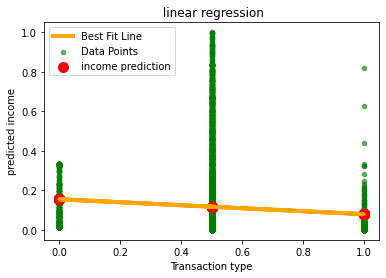

In [105]:
# Plot outputs and plot customization

plt.scatter(tran,incomee,label='Data Points', alpha=0.6,color='green',s=20)
plt.scatter(tt_test,trantype_pred, label='income prediction',color='red',s=100)
plt.plot(tt_test,trantype_pred.reshape(-1,1),label='Best Fit Line', color='orange',linewidth=4)

plt.title(' linear regression')
plt.xlabel('Transaction type')
plt.ylabel('predicted income')
plt.legend()
plt.show()

# FUNCTION FOR AUGUST

In [94]:
def august(date):
    import datetime
    date=pd.to_datetime(date, format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
    date['year'] = date.dt.year
    date['month'] = date.dt.month
    date['week'] = date.dt.isocalendar().week
    date['day'] = date.dt.day
    date['hour'] = date.dt.hour
    date['minute'] = date.dt.minute
    date['dayofweek'] = date.dt.dayofweek
    from sklearn.preprocessing import MinMaxScaler 
    scaler = MinMaxScaler()
    date=pd.DataFrame(scaler.fit_transform(date), columns=date.columns)
    y_pred = model.predict(date)
    return y_pred

In [93]:
august(2016-2-1)

AttributeError: 'NaTType' object has no attribute 'dt'